<a href="https://www.kaggle.com/code/chandu27/google-genai-capstone-project?scriptVersionId=234870148" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 📘 Title: "Empowering Everyday Tasks with Generative AI: Document Understanding, Structured JSON Output & Image Insights"

## 📌 1. Introduction

Welcome to my Capstone Project for the Generative AI course!

### Problem Statement
In today's digital world, professionals are constantly overwhelmed with documents, unstructured communication, scheduling tasks, and the need for efficient knowledge extraction. This notebook showcases how **Generative AI** can be applied to:

1. Understand complex PDF documents,
2. Generate structured data (JSON) from natural language,
3. Transform emails into actionable tasks,
4. Understand and respond to image-based content.

### Objective
This notebook demonstrates four use cases using **three or more Gen AI capabilities** to solve real-world productivity challenges.


## 🤖 2. Gen AI Capabilities Demonstrated

| Capability                      | Use Case Implemented                               |
|-------------------------------|-----------------------------------------------------|
| Document Understanding         | Summarizing AI Trends from a PDF file              |
| Structured Output (JSON)      | Converting natural language into calendar entries  |
| Few-shot Prompting            | Extracting tasks from emails                       |
| Image Understanding (Bonus)   | Identifying a dish and generating a recipe         |


📂 Environment Setup & Dependencies

In [1]:
!pip uninstall -qqy jupyterlab  # Remove unused packages from Kaggle's base image that conflict
!pip install -U -q "google-genai==1.7.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 5.3 MB/s eta 0:00:00


In [2]:
import google.generativeai as genai
from google.generativeai import types
from pprint import pprint
import json
from kaggle_secrets import UserSecretsClient
from google.colab import userdata

# Get API key securely from Kaggle secrets
GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")

# Configure
genai.configure(api_key=GOOGLE_API_KEY)

# Load Gemini Flash model
model = genai.GenerativeModel(model_name="models/gemini-1.5-flash")

In [3]:
import pathlib 
import textwrap
from IPython.display import HTML, Markdown, display

def to_markdown (text) :
    text = text. replace('•', '  *')
    return Markdown(textwrap. indent(text,'> ', predicate=lambda _: True))

## 📄 3. Use Case 1: Document Understanding (PDF Summarization)

### 🔍 Use Case

    Use generative AI to read a lengthy PDF document on AI Trends and extract a meaningful summary, key topics, and conclusions.

In [4]:
pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Read PDF
from PyPDF2 import PdfReader

# File path after uploading to Kaggle sidebar
pdf_path = "/kaggle/input/ai-trends/AI Trends.pdf"

reader = PdfReader(pdf_path)
text = ""
for page in reader.pages:
    page_text = page.extract_text()
    if page_text:
        text += page_text

# Generate summary using Gemini
prompt = f"""
You are a smart assistant. Read the following document and:
1. Summarize it in a few sentences.
2. Extract top 2 key topics.
3. List any major conclusions.

Document content:
{text[:6000]}"""  # Keeping within token limits

response = model.generate_content(prompt)
to_markdown(response.text)

> This report summarizes current trends and future advancements in Artificial Intelligence (AI), focusing on generative AI, edge AI, and responsible AI development.  Major tech companies are investing heavily in areas like multimodal models, autonomous agents, and AI-powered tools for various industries.  However, challenges remain regarding data privacy, bias, job displacement, and the need for effective regulation.
> 
> 
> **Top 2 Key Topics:**
> 
> 1. Emerging AI trends (Generative AI, Edge AI, AI for Code, Responsible AI, Autonomous Agents)
> 2. Future AI advancements by major tech companies (OpenAI, Google DeepMind, NVIDIA, Microsoft, Tesla)
> 
> 
> **Major Conclusions:**
> 
> * AI is rapidly evolving and transforming various industries.
> * The focus is shifting towards more general-purpose, adaptive, and human-aligned AI systems.
> * Responsible development, including addressing bias and ensuring data privacy, is crucial for AI's successful integration into society.
> * Collaboration and regulation are essential to manage the challenges and unlock AI's full potential.


## 4. Use Case 2: Structured Output / JSON Conversion

### 🔍 Use Case

    Turn unstructured natural language commands into structured calendar JSON entries to help automate scheduling.

In [6]:
# Prompt with examples
prompt = """You are a scheduling assistant. Convert the user's message into a JSON calendar format.
Example:
Input: "Book a meeting with Alice tomorrow at 10 AM"
Output:
{
  "event": "Meeting with Alice",
  "date": "Tomorrow",
  "time": "10:00 AM"
}

Input: "Schedule a project review with Sam on Monday at 4 PM"
Output:
{
  "event": "Project review with Sam",
  "date": "Monday",
  "time": "4:00 PM"
}

Input: "Schedule team sync-up with Raj on Friday at 2 PM"
Output:
"""

# Generate response
response = model.generate_content(prompt)
raw_output = response.text.strip()

# Show raw output
print("📝 Raw Output:\n", raw_output)

# Try parsing JSON from the model output
try:
    # Sometimes Gemini might return JSON as code block; clean it if needed
    if raw_output.startswith("```json"):
        raw_output = raw_output[7:].strip("` \n")

    calendar_data = json.loads(raw_output)
    print("\n✅ Parsed JSON Output:\n")
    pprint(calendar_data)
except json.JSONDecodeError as e:
    print("\n❌ Failed to parse JSON. Error:", e)
    print("\n🔎 Gemini Output (possibly malformed):\n", raw_output)

📝 Raw Output:
 ```json
{
  "event": "Team sync-up with Raj",
  "date": "Friday",
  "time": "2:00 PM"
}
```

✅ Parsed JSON Output:

{'date': 'Friday', 'event': 'Team sync-up with Raj', 'time': '2:00 PM'}


## 🧾 5. Use Case 3: Few-shot Prompting for Task Extraction

### 🔍 Use Case

    Convert informal email messages into structured to-do lists using few-shot prompting.


In [7]:
# Prompt with examples
prompt = """
Convert the following emails into task lists.

Example 1:
Email: Hi team, please complete the Q2 report, prepare the slides for the client call, and confirm the meeting with HR.
Tasks:
- Complete the Q2 report
- Prepare slides for the client call
- Confirm the meeting with HR

Example 2:
Email: Don’t forget to finalize the budget proposal and send it to finance. Also, schedule the vendor call.
Tasks:
- Finalize the budget proposal
- Send the budget proposal to finance
- Schedule the vendor call

Now do this one:
Email: Can you update the project roadmap, assign tickets to the dev team, and notify the stakeholders?
Tasks:
"""

# Generate response
response = model.generate_content(prompt)

# Output
print("📋 Extracted Tasks:\n")
print(response.text.strip())

📋 Extracted Tasks:

Tasks:
- Update the project roadmap
- Assign tickets to the dev team
- Notify the stakeholders


## 🍽️ 6. Use Case 4 : Image Understanding

### 🔍 Use Case

    Identify the dish from a food image and generate a detailed recipe using image + text input.

In [8]:
!curl -o image.jpg https://media-assets.swiggy.com/swiggy/image/upload/f_auto,q_auto,fl_lossy/da2592e0d25f079cbf9aedf436cabf6f

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  139k  100  139k    0     0   119k      0  0:00:01  0:00:01 --:--:--  120k


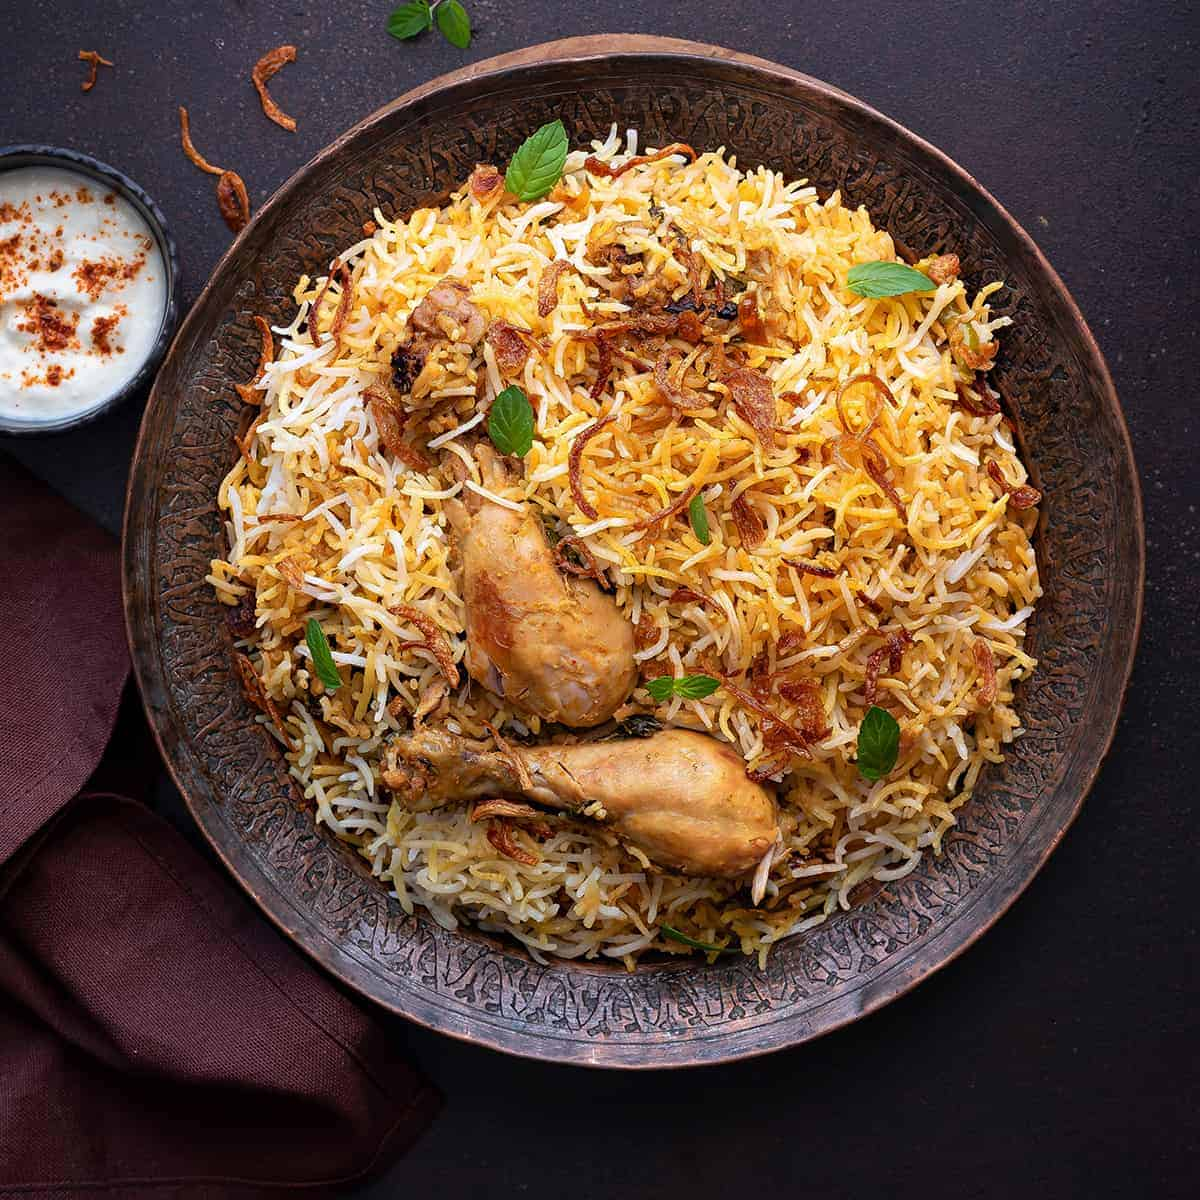

That's a delicious-looking photo of Chicken Biryani!  The image shows a large, ornate copper bowl overflowing with fluffy basmati rice, tender chicken pieces, fried onions, and fresh herbs. A small bowl of yogurt-based sauce is included on the side, likely raita.  The dark background and overall presentation are very appealing.



> That's Chicken Biryani.  Here's a recipe; note that there are many variations, and this is one interpretation.
> 
> **Ingredients:**
> 
> **For the Chicken Marinade:**
> 
> * 1.5 lbs boneless, skinless chicken thighs, cut into 1-inch pieces
> * 1 cup plain yogurt
> * 2 tbsp ginger-garlic paste
> * 1 tbsp lemon juice
> * 1 tbsp garam masala
> * 1 tbsp turmeric powder
> * 1 tsp red chili powder (adjust to taste)
> * 1 tsp coriander powder
> * 1 tsp cumin powder
> * 1/2 tsp black pepper powder
> * 1/2 tsp salt (or to taste)
> 
> **For the Biryani:**
> 
> * 1 large onion, thinly sliced
> * 1 cup basmati rice, soaked in water for at least 30 minutes
> * 2 cups water (plus extra if needed for rice)
> * 1/2 cup chopped cilantro
> * 1/4 cup chopped mint
> * 2 tbsp ghee (clarified butter) or vegetable oil
> * 1/2 cup fried onions (for garnish)
> * Saffron strands (a pinch, optional, for color and flavor)
> * Salt to taste
> 
> **Instructions:**
> 
> 1. **Marinate the Chicken:** In a large bowl, combine all the chicken marinade ingredients.  Mix well and let the chicken marinate for at least 2 hours, or preferably overnight in the refrigerator.
> 
> 2. **Sauté Onions:** Heat ghee or oil in a large pot or Dutch oven over medium heat. Add the thinly sliced onions and sauté until golden brown. Set aside.  Reserve about 1/4 cup of the fried onions for garnish.
> 
> 3. **Cook the Rice:** Add the soaked basmati rice to the pot. Add 2 cups of water (plus any extra needed to reach the desired rice consistency), salt, and saffron (if using). Bring to a boil, then reduce heat to low, cover, and simmer for 15-18 minutes, or until the rice is cooked through but not mushy. Fluff with a fork and set aside.
> 
> 4. **Cook the Chicken:**  In the same pot, add the marinated chicken and cook until browned and almost cooked through. This step builds flavor. You may need to do this in batches, depending on your pot size.
> 
> 5. **Layer the Biryani:**  In a large oven-safe dish (or continue using the pot), layer half of the cooked rice, then add the cooked chicken.  Top with the remaining rice. Sprinkle the fried onions, cilantro, and mint over the top.
> 
> 6. **Bake (optional):**  You can bake the biryani for 20-25 minutes in a preheated oven at 350°F (175°C) to create a crispier top layer.  Alternatively, you can simply cover the pot and let it sit on low heat for 10-15 minutes after layering to allow the flavors to meld.
> 
> 
> 7. **Serve:** Garnish with the remaining fried onions and fresh mint leaves. Serve hot with raita (yogurt dip, as shown in the picture)
> 
> 
> **Notes:**
> 
> * Adjust the amount of chili powder based on your spice preference.
> * You can use bone-in chicken pieces if preferred, but adjust cooking time accordingly.
> * For a richer flavor, add a few green chilies (slit) to the marinade.
> * Some recipes call for layering the rice and chicken in a more intricate way.  This recipe offers a simpler approach.
> 
> Enjoy your delicious Chicken Biryani!


In [9]:
import PIL.Image

img = PIL.Image.open("image.jpg")
display(img)

response_image = model.generate_content(img)
print(response_image.text)

response_recipe = model.generate_content(['List me the ingredients and give me a recipe to prepare this dish',img])
to_markdown(response_recipe.text)

## 📝 7. Reflections and Limitations

### What I learned:
- How generative AI can simplify real-world workflows
- The importance of prompt design for reliable output
- Structured reasoning with few-shot examples

### Limitations:
- Image understanding is context-sensitive and may vary
- PDF text extraction can lose formatting or data
- JSON parsing from LLMs may occasionally fail if prompt isn’t clear

### Future Improvements:
- Combine all these use cases into a unified productivity assistant
- Improve robustness of outputs using function calling or validators


## 📢 8. Conclusion

This project showcased how **Generative AI** can be used in practical workflows:
- Automatically summarizing content
- Structuring user commands
- Generating tasks from communication
- Understanding images for culinary use

By leveraging the capabilities of LLMs, we can build intelligent systems that help humans focus on high-level decision-making rather than repetitive tasks.
